# Haberman Dataset Exploratory Data Analysis

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's 
Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
Age of patient at time of operation (numerical)
Patient's year of operation (year - 1900, numerical)
Number of positive axillary nodes detected (numerical)
Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

Source: https://www.kaggle.com/gilsousa/habermans-survival-data-set

In [2]:
#importing the necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading the dataset into dataframe:
data = pd.read_csv('haberman.csv')

### Initial analysis

In [4]:
data.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
print(data.shape)

(306, 4)


In [6]:
print(data.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [7]:
print(data['status'].value_counts())

1    225
2     81
Name: status, dtype: int64


In [8]:
class_1 = data[data['status']==1]
class_2 = data[data['status']==2]
print('='*18+'Class 1 Stats'+'='*18)
print(class_1.describe())
print('='*49)
print('='*18+'Class 2 Stats'+'='*18)
print(class_2.describe())

==================Class 1 Stats==================
              age        year       nodes  status
count  225.000000  225.000000  225.000000   225.0
mean    52.017778   62.862222    2.791111     1.0
std     11.012154    3.222915    5.870318     0.0
min     30.000000   58.000000    0.000000     1.0
25%     43.000000   60.000000    0.000000     1.0
50%     52.000000   63.000000    0.000000     1.0
75%     60.000000   66.000000    3.000000     1.0
max     77.000000   69.000000   46.000000     1.0
==================Class 2 Stats==================
             age       year      nodes  status
count  81.000000  81.000000  81.000000    81.0
mean   53.679012  62.827160   7.456790     2.0
std    10.167137   3.342118   9.185654     0.0
min    34.000000  58.000000   0.000000     2.0
25%    46.000000  59.000000   1.000000     2.0
50%    53.000000  63.000000   4.000000     2.0
75%    61.000000  65.000000  11.000000     2.0
max    83.000000  69.000000  52.000000     2.0


#### Initial Observations:
* The means of the attributes 'age' and 'year' for class 1 and class 2 are overlapping. The quartiles also are very close.
* The 'nodes' attribute has fairly seperate mean for class 1 and class 2 and may act as the deciding attribute in case of classification.
* The mean for the 'nodes' attribute suggests that patients having less nodes had higher chances of surviving 5 years or longer.

### Univariate Analysis

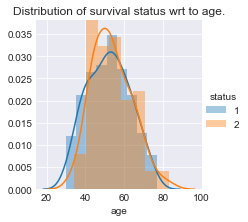

In [9]:
sns.set_style('darkgrid')
sns.FacetGrid(data,hue='status').map(sns.distplot, 'age').add_legend()
plt.title('Distribution of survival status wrt to age.')
plt.show()

#### Observations:
* As was suggested by initial analysis, age is not a very strong deciding factor for survival in this case.
* Patients in the age group ~25-40 had slightly higher chances of surviving 5 years or more.
* Patients in the age group ~40-60 had lesser chances of surviving 5 years or more.

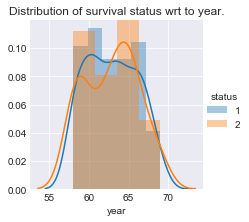

In [10]:
sns.set_style('darkgrid')
sns.FacetGrid(data,hue='status').map(sns.distplot, 'year').add_legend()
plt.title('Distribution of survival status wrt to year.')
plt.show()

#### Observations:
* Patients who were operated upon between ~1958-1962 had comparatively more chances of surviving 5 years or more.
* Patients who were operated upon between ~1962-1966 had comparatively lesser chances of surviving 5 years or more.
* Like the age attribute, the year also does not play a very huge role in deciding the chances of survival.

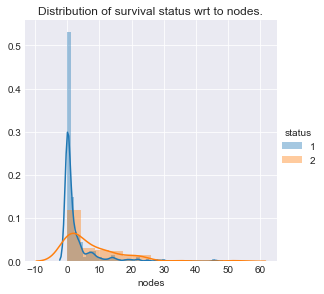

In [11]:
sns.set_style('darkgrid')
sns.FacetGrid(data,hue='status',size=4).map(sns.distplot, 'nodes').add_legend()
plt.title('Distribution of survival status wrt to nodes.')
plt.show()

#### Obsevations:
* There is a significant higher chance of survival for patients having 1 or no nodes.
* For patients having more than 3 nodes, the chances of survival 5 years or more dramatically decreases.
* The number of nodes looks like the strongest deciding factor in case of surviving 5 years or more.

class 1
[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
class 2
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


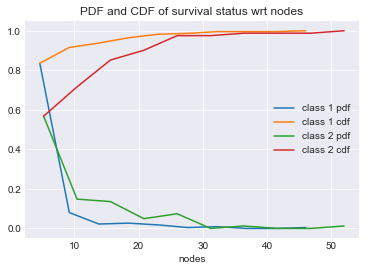

In [12]:
#Since 'nodes' is the most important attribute, let's explore the cdf:
counts_1, edges_1 = np.histogram(class_1['nodes'], bins=10, density=True)
pdf_1 = counts_1/sum(counts_1)
cdf_1 = np.cumsum(pdf_1)
print('class 1')
print(pdf_1)
print(edges_1)
plt.plot(edges_1[1:], pdf_1)
plt.plot(edges_1[1:], cdf_1)
plt.xlabel('nodes')
print('=========================================================')
counts_2, edges_2 = np.histogram(class_2['nodes'], bins=10, density=True)
pdf_2 = counts_2/sum(counts_2)
cdf_2 = np.cumsum(pdf_2)
print('class 2')
print(pdf_2)
print(edges_2)
plt.plot(edges_2[1:], pdf_2)
plt.plot(edges_2[1:], cdf_2)
plt.xlabel('nodes')
plt.title('PDF and CDF of survival status wrt nodes')
plt.legend(['class 1 pdf','class 1 cdf','class 2 pdf','class 2 cdf'])
plt.show()

#### Observations:
* More than 83% of the patients who survived had less than 4.6 nodes.

#### Analysis with box and violin plots

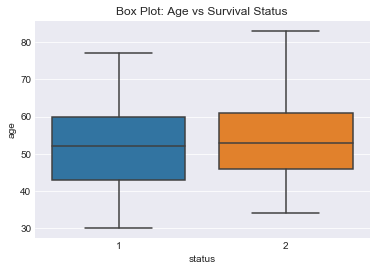

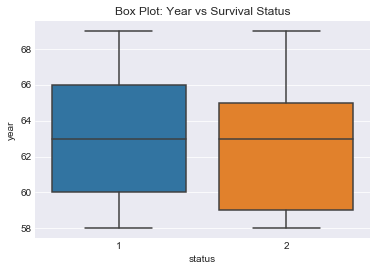

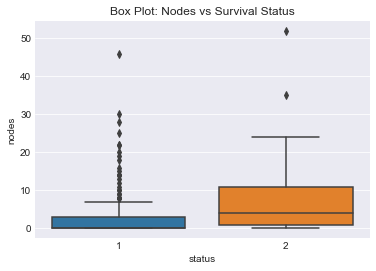

In [13]:
sns.boxplot(x='status',y='age',data=data)
plt.title('Box Plot: Age vs Survival Status')
plt.show()
sns.boxplot(x='status',y='year',data=data)
plt.title('Box Plot: Year vs Survival Status')
plt.show()
sns.boxplot(x='status',y='nodes',data=data)
plt.title('Box Plot: Nodes vs Survival Status')
plt.show()

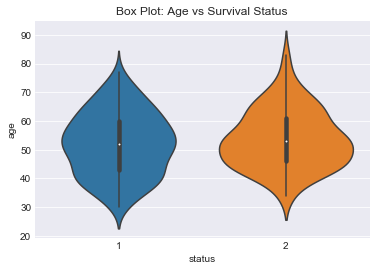

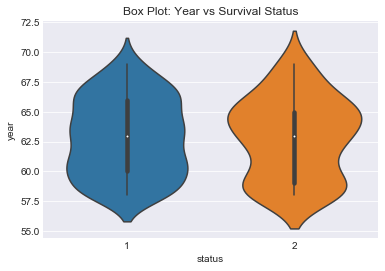

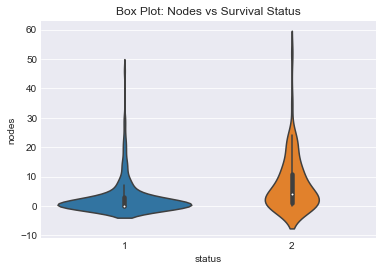

In [17]:
sns.violinplot(x='status',y='age',data=data)
plt.title('Box Plot: Age vs Survival Status')
plt.show()
sns.violinplot(x='status',y='year',data=data)
plt.title('Box Plot: Year vs Survival Status')
plt.show()
sns.violinplot(x='status',y='nodes',data=data)
plt.title('Box Plot: Nodes vs Survival Status')
plt.show()

#### Observations:
* The violin plot combined with the box plot for 'nodes' strengthens our earlier observation that lesser the number of nodes, more the chances of surviving 5 years or more.

### Bivariate Analysis

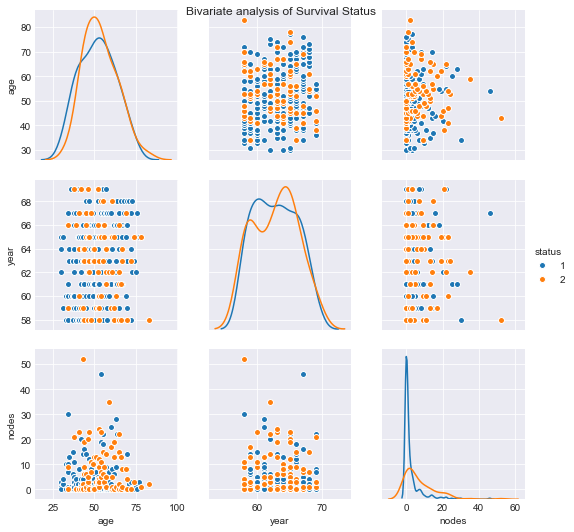

In [22]:
sns.pairplot(data, hue='status', x_vars = ['age','year','nodes'], y_vars = ['age','year','nodes'], diag_kind = 'kde').fig.\
suptitle('Bivariate analysis of Survival Status')
plt.show()

#### Observations:
Though not much significant, the pairplots do provide some additional insights:
* Looking at pairplot of nodes and age, we can deduce that patients less than 40 years of age had more survivals.
* The patients operated upon in 1960 had more survival rate.
* Patients of age more than 60 who were operated upon in 1968 had more survivals.

#### Analysis with Contour Plot

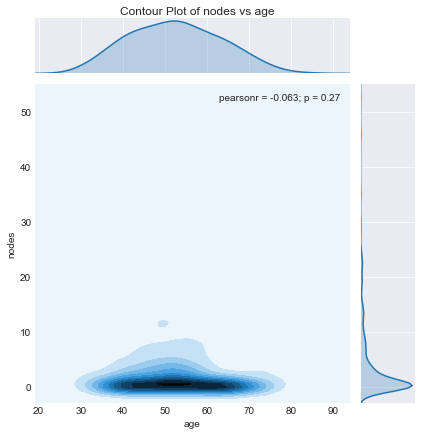

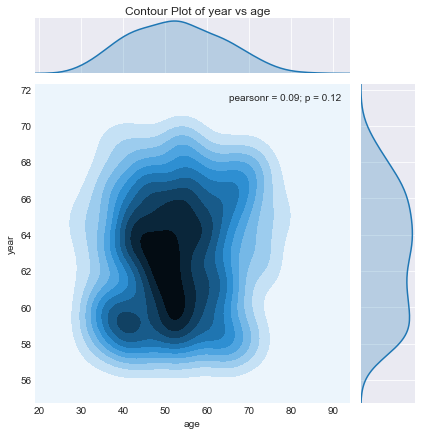

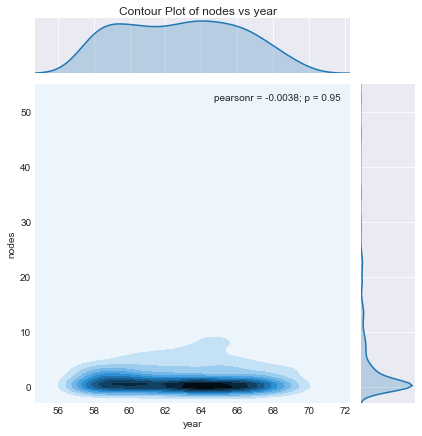

In [36]:
sns.jointplot(x='age',y='nodes',kind='kde',data=data)
plt.title('Contour Plot of nodes vs age',y=1.2,x=-3)
plt.show()
sns.jointplot(x='age',y='year',kind='kde',data=data)
plt.title('Contour Plot of year vs age',y=1.2,x=-3)
plt.show()
sns.jointplot(x='year',y='nodes',kind='kde',data=data)
plt.title('Contour Plot of nodes vs year',y=1.2,x=-3)
plt.show()

#### Observations:
* From the first  and third contour plot we can loosely see that, irrespective of the age and year of operation, the number of nodes decides the survival category.

### Conclusions:
##### From the above data analysis we conclude that:
* Number of nodes are most important in deciding the survival category.
* More than 83% of the patients who survived had less than 4.6 nodes.
* Age and Year play a very minor role in deciding the survival category.